Let's analyze the data for Toxic Release emissions on Land:

In [1]:
import pandas as pd
import fpsnippets
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("land-toxic-release.csv",  usecols = ['CITY_NAME','COUNTY_NAME', 'STATE_ABBR', 'ZIP_CODE', 'REPORTING_YEAR', 'CHEM_NAME', 'CARCINOGEN'])

In [3]:
stateMask = data['STATE_ABBR'] == "PA" #create masks
cityMask = data['CITY_NAME'] == "PITTSBURGH"
countyMask = data['COUNTY_NAME']== "ALLEGHENY"

#let's use these query masks to get only the info for Allegheny County in Pittsburgh,PA
relevantData = data[stateMask & cityMask & countyMask]

In [23]:
#Getting a list of unique zip codes in the area
zips = relevantData['ZIP_CODE'].unique()
zips.sort()
landDict=dict()

#Now, let's count the number of carniogens found in each zip code
x = 0;
for zip in zips:
    carcCounter = 0;
    mask = relevantData['ZIP_CODE'] == zip
    maskedData = relevantData[mask]
    for row in maskedData:
        carcYorN = relevantData.iloc[x,6]
        if carcYorN == "Y":
            carcCounter = carcCounter + 1
        x = x + 1
#Here, we're keeping a count of the carcinogens in each neighborhood
    neighborhoods = fpsnippets.zip_to_neighborhoods(zip)
    if neighborhoods is not None:
        for neighborhood in neighborhoods:
            if neighborhood in landDict:
                landDict[neighborhood] += carcCounter
            else: 
                landDict[neighborhood] = carcCounter
#Let's print the zips and neighborhoods with no carcinogens found
#just to see them
    if carcCounter == 0:
        print(zip, ":", carcCounter, " Carcinogens found")
        print("Neighborhoods in zip", zip, ":", fpsnippets.zip_to_neighborhoods(zip), "\n")

15203 : 0  Carcinogens found
Neighborhoods in zip 15203 : ['Arlington Heights', 'Allentown', 'South Side Slopes', 'Arlington', 'Mount Washington', 'South Shore', 'South Side Flats'] 

15204 : 0  Carcinogens found
Neighborhoods in zip 15204 : ['Fairywood', 'Crafton Heights', 'Chartiers City', 'Esplen', 'Sheraden', 'Windgap', 'Elliott'] 

15205 : 0  Carcinogens found
Neighborhoods in zip 15205 : ['Oakwood', 'Westwood', 'Fairywood', 'East Carnegie', 'Crafton Heights', 'Windgap'] 

15206 : 0  Carcinogens found
Neighborhoods in zip 15206 : ['Point Breeze North', 'Squirrel Hill North', 'Garfield', 'East Liberty', 'Morningside', 'Homewood North', 'Larimer', 'Lincoln-Lemington-Belmar', 'Highland Park', 'Friendship', 'Homewood West', 'Bloomfield', 'Point Breeze', 'Stanton Heights', 'Shadyside'] 

15207 : 0  Carcinogens found
Neighborhoods in zip 15207 : ['Glen Hazel', 'Lincoln Place', 'Hays', 'Greenfield', 'New Homestead', 'Hazelwood', 'South Oakland', 'Squirrel Hill South'] 

15208 : 0  Carcin

In [30]:
print(landDict) #Let's check the dictionary

{'Garfield': 4, 'East Liberty': 4, 'Morningside': 4, 'Lower Lawrenceville': 4, 'Polish Hill': 4, 'Bloomfield': 4, 'Central Lawrenceville': 4, 'Stanton Heights': 4, 'Strip District': 4, 'Upper Lawrenceville': 4, 'Marshall-Shadeland': 14, 'Brighton Heights': 14, 'Arlington Heights': 0, 'Allentown': 0, 'South Side Slopes': 0, 'Arlington': 0, 'Mount Washington': 4, 'South Shore': 0, 'South Side Flats': 0, 'Fairywood': 0, 'Crafton Heights': 0, 'Chartiers City': 0, 'Esplen': 0, 'Sheraden': 0, 'Windgap': 0, 'Elliott': 0, 'Oakwood': 0, 'Westwood': 0, 'East Carnegie': 0, 'Point Breeze North': 0, 'Squirrel Hill North': 0, 'Homewood North': 0, 'Larimer': 0, 'Lincoln-Lemington-Belmar': 1, 'Highland Park': 0, 'Friendship': 0, 'Homewood West': 0, 'Point Breeze': 0, 'Shadyside': 0, 'Glen Hazel': 0, 'Lincoln Place': 0, 'Hays': 0, 'Greenfield': 0, 'New Homestead': 0, 'Hazelwood': 0, 'South Oakland': 0, 'Squirrel Hill South': 0, 'Homewood South': 0, 'East Hills': 0, 'Perry North': 4, 'Northview Heights'

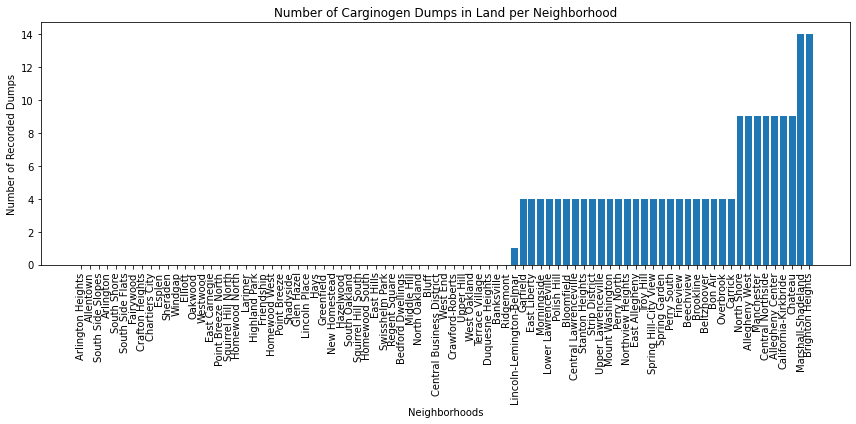

Text(0.5, 1.0, 'Number of Carcinogens Released onto Land per Neighborhood')

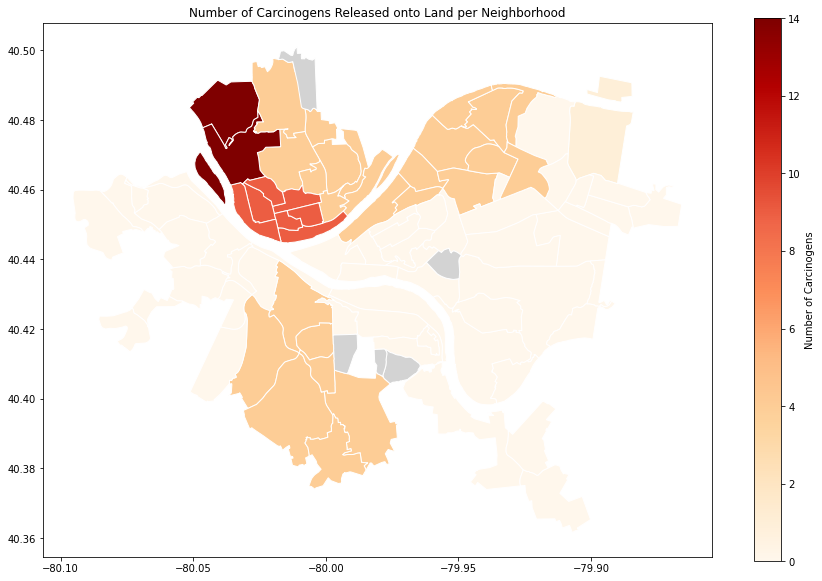

In [34]:
#Sort data
sortedLandDict = dict(sorted(landDict.items(), key=lambda item: item[1]))
landDF = pd.Series(sortedLandDict).to_frame()

#Create a bargraph of info using matlib
plt.figure(figsize=(12, 6)) 
plt.bar(landDF.index, landDF[0])
plt.xlabel("Neighborhoods")  
plt.ylabel("Number of Recorded Dumps")  
plt.title("Number of Carginogen Dumps in Land per Neighborhood") 
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

#Create a map using geopadas
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
landMap = neighborhoods.merge(landDF, how='left', left_on='hood', right_index=True)

landMap.plot(column= 0, 
               cmap='OrRd',             
               edgecolor="white",        
               legend=True,  
               legend_kwds={'label': "Number of Carcinogens"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )
plt.title("Number of Carcinogens Released onto Land per Neighborhood")